<a href="https://colab.research.google.com/github/j88620714/DataScience/blob/master/HW1/linePlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gspread
!pip install oauth2client
!pip install Pillow
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 20.0MB/s 


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1_7FyladR7eGnmUjsCvNF1XnpVZpuNGXm' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  #fname = os.path.join(local_download_path, f['title'])
  fname = os.path.join('/content', f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
!ls "/root/data"

title: linePlot_TwoLines.ipynb, id: 1-m9LEIK5RHWw6gVtKNfuecEbUJbxsBvh
downloading to /content/linePlot_TwoLines.ipynb
title: Frechet.ipynb, id: 1rjh78sM8vRXoyqdOgDt7YAYgchjawvHG
downloading to /content/Frechet.ipynb
title: 標記顯著速度差異.ipynb, id: 1AM9X_LwPT7wA4lDu42OQ-tbc23q_vedD
downloading to /content/標記顯著速度差異.ipynb
title: 復興南路2.ipynb, id: 1QyxaBmyotcR5YhBxm7rtT7xlnma5byNr
downloading to /content/復興南路2.ipynb
title: NotoSansCJKtc-Regular.otf, id: 1fY1VCoDLMTrMyEQLrXghet2ZJjKX3iZv
downloading to /content/NotoSansCJKtc-Regular.otf


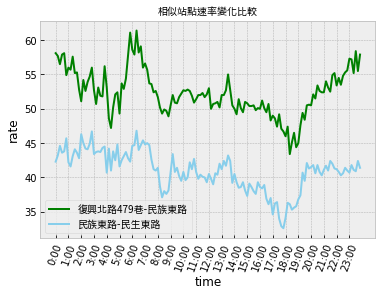

<Figure size 432x288 with 0 Axes>

In [0]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from oauth2client.client import GoogleCredentials
from google.colab import auth
from google.colab import files
auth.authenticate_user()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from IPython.display import Image
gc = gspread.authorize(GoogleCredentials.get_application_default())
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
wks4 = sh.worksheet("復興南北路")

time= wks4.col_values(3)
time.pop(0)
time.pop(0)
time.pop(0)
time_axix = range(0,10*(len(time)),10)
timex=[]
timex2=[]
for j in range(1,len(time),6):
    timex.append(time[j-1].split('~'))
for k in range(len(timex)):
    timex2.append(timex[k][0])
fontPath = 'NotoSansCJKtc-Regular.otf'
font30 = fm.FontProperties(fname=fontPath, size=10)    
                  
def drawline(n,cr) :         
  y1 = wks4.col_values(n)
  y1.pop(0)
  y1.pop(0)
  y1.pop(0)
  for i in range(len(y1)):
    y1[i]=eval(y1[i])
  sub_axix = filter(lambda x:x%200 == 0, time_axix) 
  plt.style.use('bmh')
  plt.plot(time_axix, y1, color= cr , label=wks4.cell(3,n).value)

  
datasets = [4,5]
colorsets = ['green','skyblue']
for i in range(0,len(datasets)):
  drawline(datasets[i],colorsets[i])
  
plt.legend(prop=font30)  
plt.xticks(range(0,10*len(time),60),timex2, rotation=70)
plt.title('相似站點速率變化比較',fontproperties=font30)
plt.xlabel('time')
plt.ylabel('rate')
fig = plt.figure()
#fig.savefig('相鄰站速率.png')
#files.download('相鄰站速率.png')
plt.show()
